In [ ]:
# Import necessary libraries and set seed
import numpy as np
import matplotlib.pyplot as plt
import os
import keras

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
keras.utils.set_random_seed(23)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

# Reshape data and normalize
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')

# Convert labels to categorical format
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [ ]:
# Define a simple MLP model for MNIST
M = keras.Sequential([
    keras.Input(shape=(input_dim,)),
    keras.layers.Dense(800, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Print model summary
M.summary()

# Calculate number of parameters in each layer
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

# Compile the model
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


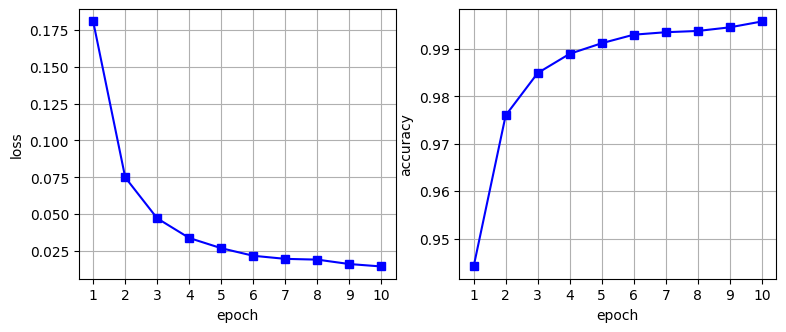

In [ ]:
# Train the model
H = M.fit(x_train, y_train, batch_size=16, epochs=10, verbose=0)

# Plot training loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)

ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], color='b', marker='s')

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_xticks(xx)
ax.plot(xx, H.history['accuracy'], color='b', marker='s')

In [ ]:
# Evaluate the model on test data
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.1097
Precisión: 98.0%


In [ ]:
# Import necessary libraries for Fashion-MNIST
import numpy as np
import matplotlib.pyplot as plt
import os
import keras

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
keras.utils.set_random_seed(23)

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

# Reshape data and normalize
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')

# Convert labels to categorical format
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)
